In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/tommats00/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

<Axes: title={'center': 'Average commerical salmon catch per region (by thousands of fish)'}, xlabel='Region', ylabel='Average salmon catch (by thousands of fish)'>

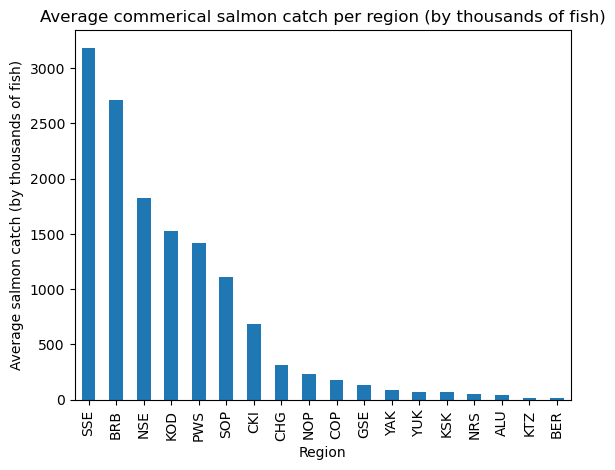

In [2]:
# FINAL CODE
import pandas as pd

# Read in data using pd.read_csv()
catch_data = pd.read_csv('data/salmon_data.csv')

# Use `drop()` with axis = 1 to signify dropping a column
catch_data = catch_data.drop('notesRegCode', axis = 1)

# Use `.at[]` to replace the value I with 1
catch_data.at[400, 'Catch'] = 1

# Index 'Catch' column and use method `astype()` to change to an int64 
catch_column_type = catch_data['Catch'].astype('int64')

# Use `assign()` to replace 'Catch' column with updated catch_column_type object
# This replaces old 'Catch' column, then groupby and calculate mean of 'Region'
avg_region = (catch_data.assign(Catch=catch_column_type)
             .groupby('Region')
             .Catch
             .mean().
             sort_values(ascending = False)
             )

# Plot avg_region data to create a bar graph of catch data by each region
avg_region.plot(kind = 'bar',
               xlabel= 'Region',
               ylabel= 'Average salmon catch (by thousands of fish)',
               title = 'Average commerical salmon catch per region (by thousands of fish)')


## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [3]:
# Import libraries
import pandas as pd

In [4]:
# a.
# Read in data using pd.read_csv()
catch_data = pd.read_csv('data/salmon_data.csv')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [5]:
# b.
# Explore data using head(), info(), dtypes
print(catch_data.head(3))

print(catch_data.info())

  Region  Year notesRegCode  Species Catch
0    SSE  1886          NaN  Chinook     0
1    SSE  1887          NaN  Chinook     0
2    SSE  1888          NaN  Chinook     0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540 entries, 0 to 8539
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Region        8540 non-null   object
 1   Year          8540 non-null   int64 
 2   notesRegCode  1415 non-null   object
 3   Species       8540 non-null   object
 4   Catch         8540 non-null   object
dtypes: int64(1), object(4)
memory usage: 333.7+ KB
None


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

Using the method `head()` is always a go to when exploring the data. It gives you a great glimpse of how many and what kind of variables you are working with. I also like to use the `info()` method as it tells you what type of data each variable is, along with how many non-null values that are for each. This gives us some insight to how many NA values we have in our data set. 

**For some reason, I couldn't use the cell above and below this one. I had to add two new cells to answer the questions. I also couldn't delete them.**

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [6]:
# Index to variable `notesRegCode` and use `unique()` to see how many options there are for the variable
notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [7]:
# Use `drop()` with axis = 1 to signify dropping a column
catch_data = catch_data.drop('notesRegCode', axis = 1)

catch_data.head()

,Region,Year,Species,Catch
0,SSE,1886,Chinook,0
1,SSE,1887,Chinook,0
2,SSE,1888,Chinook,0
3,SSE,1889,Chinook,0
4,SSE,1890,Chinook,0


<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


In [8]:
# Check columns data type 
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

The catch data has object types for each variable except the `Year`. The `Year` variable is an `int64` type meaning that it is an integer. Being that a year is expressed as a numerical value it does make sense. However, it might be a good thing to change it into a datetime64. LIkewise, the `Catch` column should not be an object, but instead an integer. We should change it into an `int64` data type. 

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [9]:
# Run code chunk and think about what the error at the bottom means
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [10]:
# Index to Catch column and set it equal to I to find the unwanted string
catch_I = catch_data[catch_data['Catch'] == 'I']
catch_I 

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [11]:
# Use `.at[]` to replace the value I with 1
catch_data.at[400, 'Catch'] = 1

# Check to see if I has been replaced with 1, using `loc[]`
catch_1 = catch_data.loc[400, ]
catch_1

Region         GSE
Year          1955
Species    Chinook
Catch            1
Name: 400, dtype: object

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [12]:
# Index 'Catch' column and use method `astype()` to change to an int64 
catch_column_type = catch_data['Catch'].astype('int64').dtypes
catch_column_type

dtype('int64')

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [13]:
# Use `assign()` to replace 'Catch' column with updated catch_column_type object
# This replaces old 'Catch' column, then groupby and calculate mean of 'Region'
avg_region = (catch_data.assign(Catch=catch_data['Catch'].astype('int64'))
             .groupby('Region')
             .Catch
             .mean().
             sort_values(ascending = False)
             )

avg_region

Region
SSE    3184.660714
BRB    2709.796491
NSE    1825.020870
KOD    1528.350000
PWS    1419.236697
SOP    1110.942222
CKI     683.571429
CHG     315.487273
NOP     229.493478
COP     179.223404
GSE     133.841463
YAK      91.922917
YUK      68.645570
KSK      67.642353
NRS      51.502703
ALU      40.383908
KTZ      18.836145
BER      16.372549
Name: Catch, dtype: float64

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

<Axes: title={'center': 'Average commerical salmon catch per region (by thousands of fish)'}, xlabel='Region', ylabel='Average salmon catch (by thousands of fish)'>

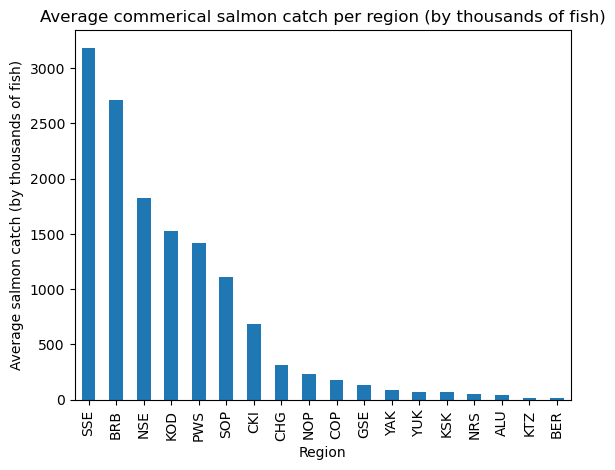

In [14]:
# Make a simple bar plot using `plot()` method
avg_region.plot(kind = 'bar',
               xlabel= 'Region',
               ylabel= 'Average salmon catch (by thousands of fish)',
               title = 'Average commerical salmon catch per region (by thousands of fish)')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

The regions with the most salmon catch were Southern Southeast Alaska, Bristol Bay Mangement Area, Northern Southeast ALaska, and Kodiak Management Area. Southern Southeast Alaska and Bristol Bay Management Area were substantially higher than the rest of the regions. They had about 3200 and 2700 average salmon catch. 

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).